In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print(tf.__version__)

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

#  Import and read the red_wine_quality.csv.
import pandas as pd 
red_wine_df = pd.read_csv("red_wine_quality.csv")
red_wine_df

2.7.0


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulfates,alcohol,quality
0,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1589,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1590,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1591,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
# Drop the non-beneficial ID columns, 'type', 'residual_sugar', 'free_sulfur_dioxide', and 'ph'.
red_wine_df.drop(['type', 'residual_sugar', 'free_sulfur_dioxide', 'ph'], axis=1, inplace=True)

In [3]:
# Determine the number of unique values in each column of red_wine_df.
red_wine_df.nunique()

fixed_acidity            96
volatile_acidity        143
citric_acid              80
chlorides               153
total_sulfur_dioxide    144
density                 435
sulfates                 96
alcohol                  65
quality                   6
dtype: int64

In [4]:
train_dataset = red_wine_df.sample(frac=0.8, random_state=0)
test_dataset = red_wine_df.drop(train_dataset.index)

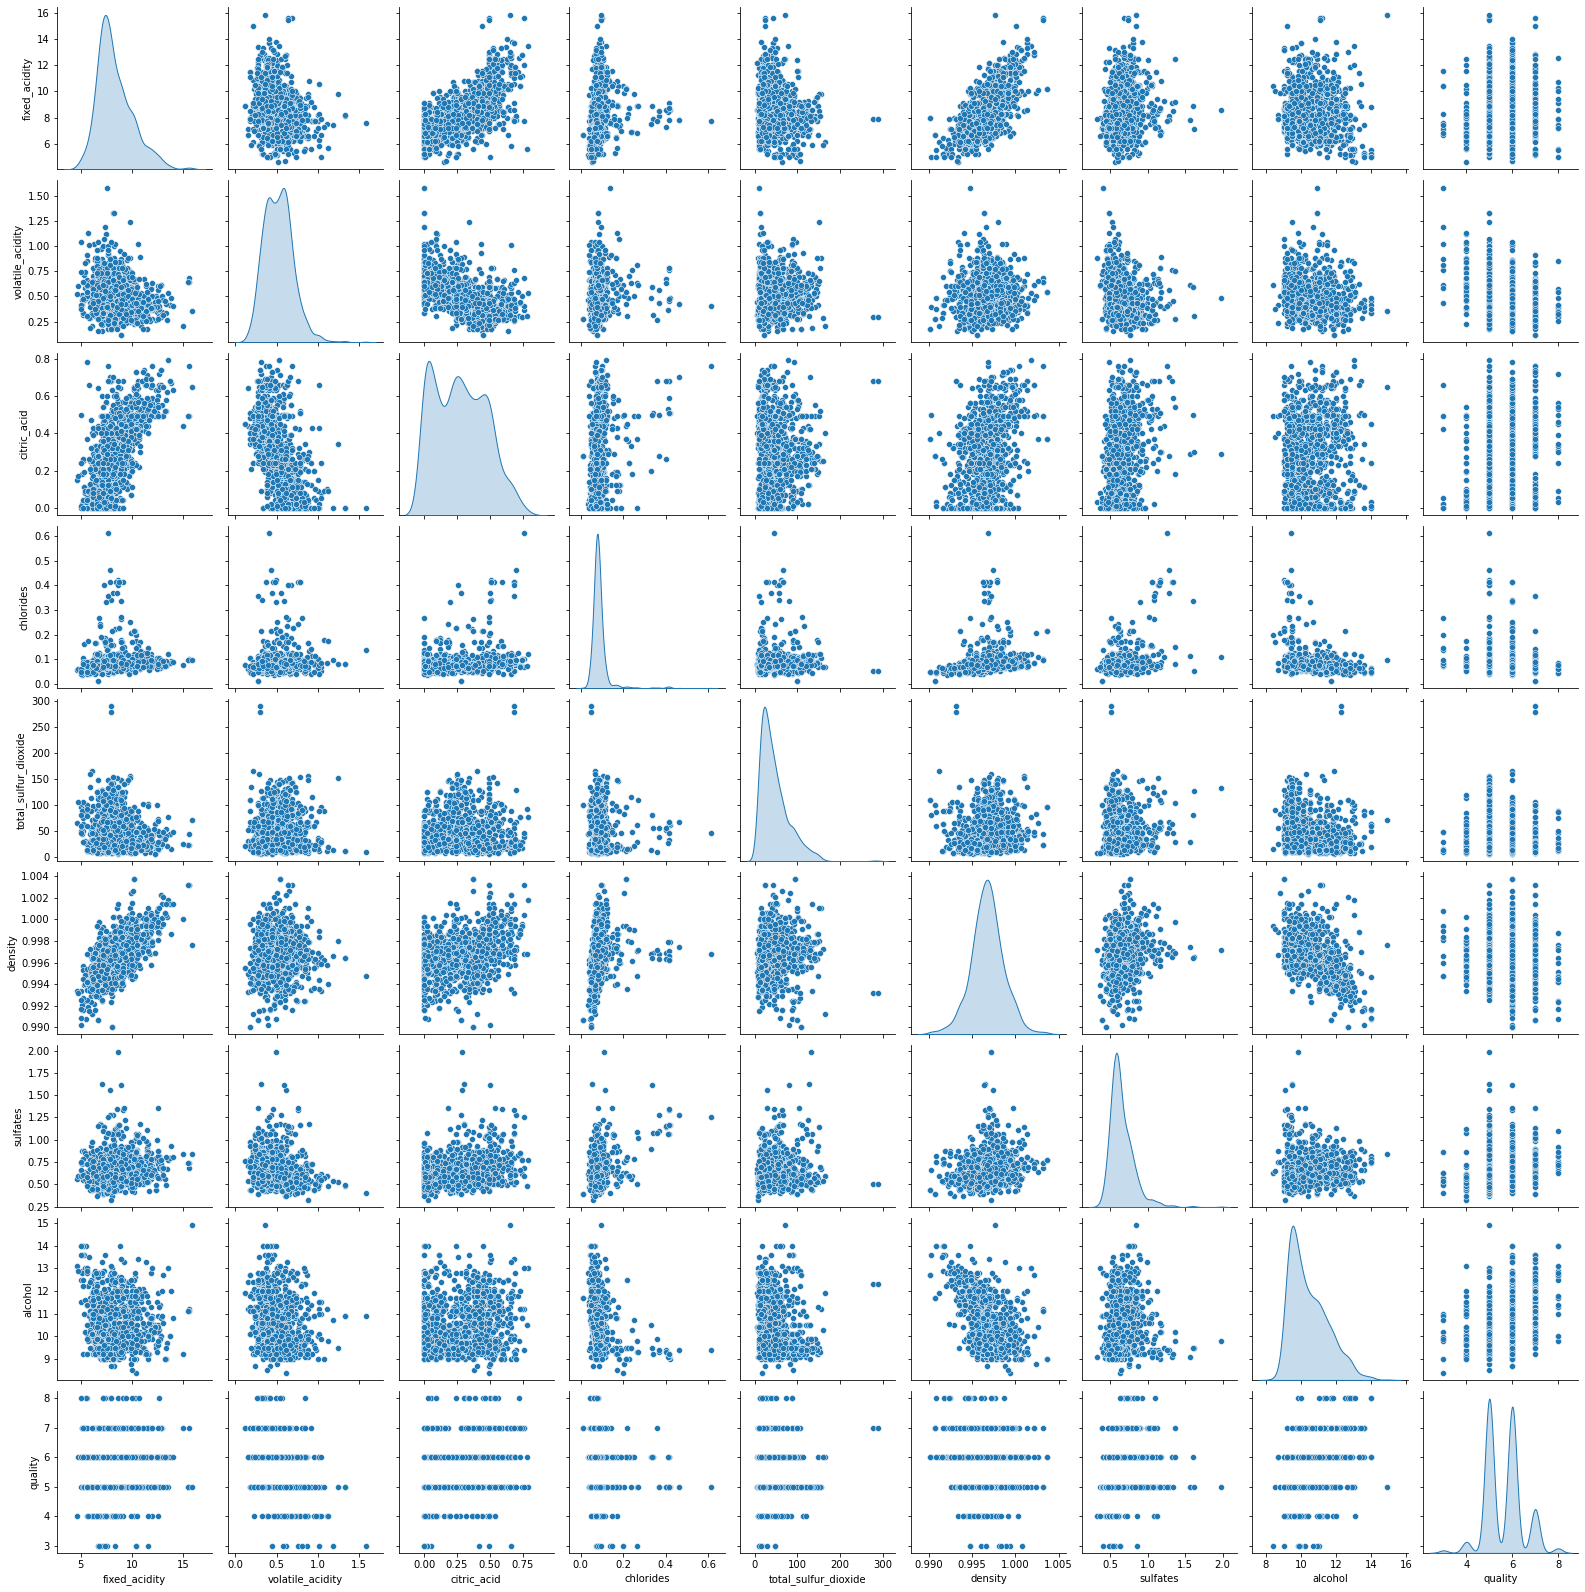

In [5]:
sns.pairplot(train_dataset[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides', 'total_sulfur_dioxide', 'density', 'sulfates', 'alcohol', 'quality']], diag_kind='kde')

In [6]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1274.0,8.314521,1.738886,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1274.0,0.522704,0.175445,0.12000,0.3900,0.52000,0.630000,1.58000
citric_acid,1274.0,0.273721,0.195686,0.00000,0.0900,0.26000,0.430000,0.79000
chlorides,1274.0,0.087286,0.045751,0.01200,0.0710,0.07900,0.091000,0.61100
total_sulfur_dioxide,1274.0,46.558085,33.283232,6.00000,22.0000,37.00000,62.750000,289.00000
density,1274.0,0.996731,0.001905,0.99007,0.9956,0.99673,0.997837,1.00369
sulfates,1274.0,0.654341,0.160809,0.33000,0.5500,0.62000,0.730000,1.98000
alcohol,1274.0,10.439050,1.083106,8.40000,9.5000,10.20000,11.100000,14.90000
quality,1274.0,5.638148,0.807558,3.00000,5.0000,6.00000,6.000000,8.00000


In [7]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('quality')
test_labels = test_features.pop('quality')

In [8]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
fixed_acidity,8.314521,1.738886
volatile_acidity,0.522704,0.175445
citric_acid,0.273721,0.195686
chlorides,0.087286,0.045751
total_sulfur_dioxide,46.558085,33.283232
density,0.996731,0.001905
sulfates,0.654341,0.160809
alcohol,10.439050,1.083106
quality,5.638148,0.807558


In [9]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [10]:
normalizer.adapt(np.array(train_features))

In [11]:
print(normalizer.mean.numpy())

[[ 8.315  0.523  0.274  0.087 46.558  0.997  0.654 10.439]]


In [12]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 6.8   0.59  0.06  0.06 18.    1.    0.59 10.8 ]]

Normalized: [[-0.87  0.38 -1.09 -0.6  -0.86 -0.28 -0.4   0.33]]


# Linear Regression

In [13]:
alcohol = np.array(train_features['alcohol'])

alcohol_normalizer = layers.Normalization(input_shape=[1,], axis=None)
alcohol_normalizer.adapt(alcohol)

In [14]:
alcohol_model = tf.keras.Sequential([
    alcohol_normalizer,
    layers.Dense(units=1)
])

alcohol_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [15]:
alcohol_model.predict(alcohol[:10])

array([[-0.011],
       [-0.067],
       [-0.046],
       [ 0.022],
       [-0.073],
       [ 0.013],
       [ 0.061],
       [-0.032],
       [-0.014],
       [ 0.001]], dtype=float32)

In [16]:
alcohol_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [17]:
%%time
history = alcohol_model.fit(
    train_features['alcohol'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 18.4 s


In [18]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.539469,0.604942,95
96,0.536387,0.601375,96
97,0.534402,0.603804,97
98,0.536901,0.607551,98
99,0.549136,0.603319,99


In [19]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [quality]')
  plt.legend()
  plt.grid(True)

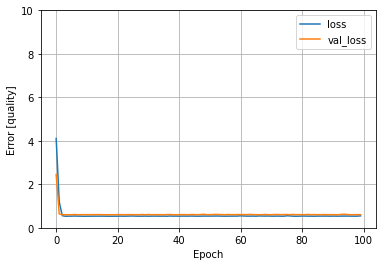

In [20]:
plot_loss(history)

In [21]:
test_results = {}

test_results['alcohol_model'] = alcohol_model.evaluate(
    test_features['alcohol'],
    test_labels, verbose=0)

In [22]:
x = tf.linspace(0.0, 25, 26)
y = alcohol_model.predict(x)

In [23]:
def plot_alcohol(x, y):
  plt.scatter(train_features['alcohol'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('alcohol')
  plt.ylabel('quality')
  plt.legend()

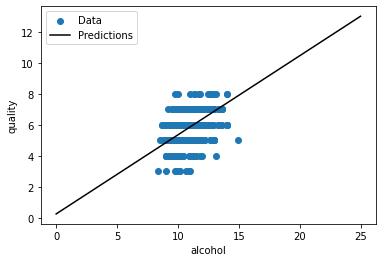

In [24]:
plot_alcohol(x, y)

## Multivariable Linear Regression

In [25]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [26]:
linear_model.predict(train_features[:10])

array([[-0.689],
       [-2.391],
       [ 1.113],
       [ 1.868],
       [-4.332],
       [ 1.213],
       [ 3.181],
       [ 1.526],
       [-2.603],
       [ 2.205]], dtype=float32)

In [27]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(8, 1) dtype=float32, numpy=
array([[ 0.502],
       [-0.521],
       [ 0.608],
       [ 0.556],
       [-0.723],
       [-0.596],
       [-0.768],
       [-0.452]], dtype=float32)>

In [28]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [29]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 15.7 s


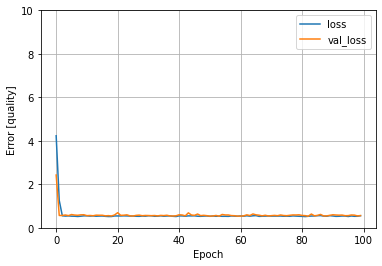

In [35]:
plot_loss(history)

In [36]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

## Regression using a Deep Learning Neural Network

In [37]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [38]:
dnn_alcohol_model = build_and_compile_model(alcohol_normalizer)

In [39]:
dnn_alcohol_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [41]:
%%time
history = dnn_alcohol_model.fit(
    train_features['alcohol'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 19 s


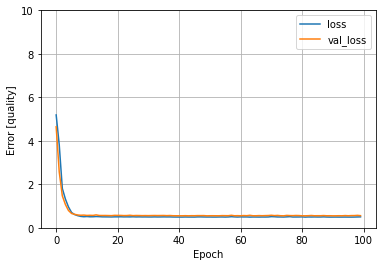

In [42]:
plot_loss(history)

In [46]:
x = tf.linspace(0.0, 20, 21)
y = dnn_alcohol_model.predict(x)

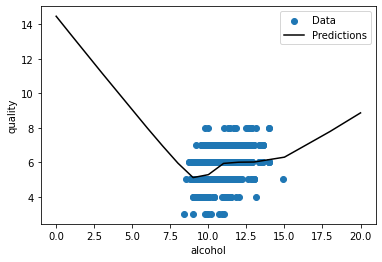

In [47]:
plot_alcohol(x, y)

In [48]:
test_results['dnn_alcohol_model'] = dnn_alcohol_model.evaluate(
    test_features['alcohol'], test_labels,
    verbose=0)

## DNN with Multiple Inputs

In [49]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                576       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,818
Trainable params: 4,801
Non-trainable params: 17
_________________________________________________________________


In [50]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 19.9 s


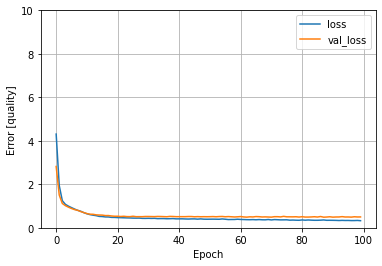

In [51]:
plot_loss(history)

In [52]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [53]:
pd.DataFrame(test_results, index=['Mean absolute error [quality]']).T

,Mean absolute error [quality]
alcohol_model,0.524618
linear_model,0.481851
dnn_alcohol_model,0.485637
dnn_model,0.481809


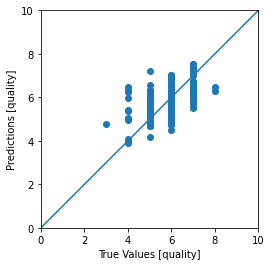

In [55]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [quality]')
plt.ylabel('Predictions [quality]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

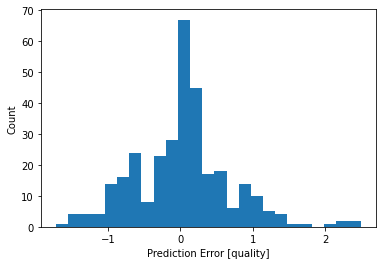

In [56]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [quality]')
_ = plt.ylabel('Count')

In [57]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model\assets


In [58]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [61]:
pd.DataFrame(test_results, index=['Mean absolute error [quality]']).T

,Mean absolute error [quality]
alcohol_model,0.524618
linear_model,0.481851
dnn_alcohol_model,0.485637
dnn_model,0.481809
reloaded,0.481809


In [33]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

NameError: name 'X_train' is not defined

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
number_hidden_nodes_layer1 =  10
number_hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=number_hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=number_hidden_nodes_layer2, activation="relu", input_dim=number_input_features))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

In [ ]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    batch_size=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")